### Etude sur Introduction aux réseaux de neurones artificiels 2 - classification

La classification par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Breast cancer wisconsin (diagnostic) dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

多層パーセプトロンによる分類を、Breast cancer wisconsin (diagnosis)データセットを例に、Jupyter Notebookで説明します。

    MLPClassifier(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)


### préparation des data

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neural_network 
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

### 2 - Chargement des données du Brest cancer

In [2]:
# Load data
breast_cancer = datasets.load_breast_cancer()

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Creating Regression Design Matrix 
X = breast_cancer.data
# Creating target dataset
y = breast_cancer.target

In [5]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 3 - afficher le dataFrame breast_cancer

In [6]:
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 30)

In [8]:
df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

### 4 - afficher le correlation matrix

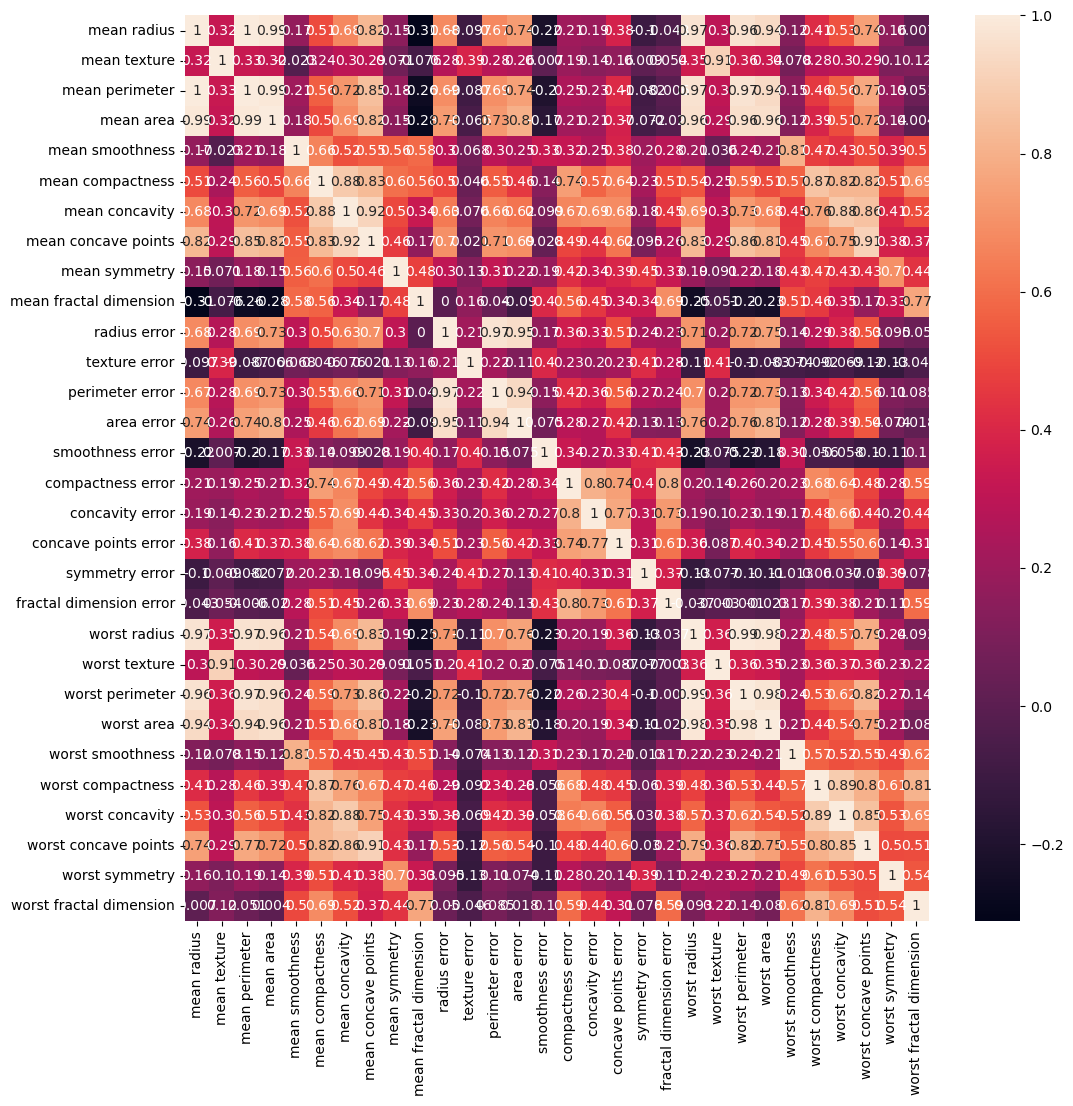

In [9]:
plt.figure(1, figsize=(12, 12), dpi=100)
correlation_matrix = df.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### 5 - spiliter les données pour train et test

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### 6 - feature scaling

In [12]:
# standardization 標準化 平均0、分散1
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [13]:
X_test_sc = sc.transform(X_test)

In [14]:
X_test_sc

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [15]:
ms = MinMaxScaler()
X_train_ms = ms.fit_transform(X_train)

In [16]:
X_test_ms = ms.transform(X_test)

In [17]:
X_test_ms

array([[0.23404672, 0.30064254, 0.23595106, ..., 0.34879725, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53834116, ..., 0.61477663, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38255797, ..., 0.52027491, 0.25073921,
        0.21320787],
       ...,
       [0.18752143, 0.17653027, 0.1845924 , ..., 0.33017182, 0.2166371 ,
        0.19540522],
       [0.31975121, 0.61345959, 0.31747048, ..., 0.28243986, 0.06406466,
        0.19430315],
       [0.63857192, 0.72404464, 0.62441315, ..., 0.57010309, 0.25684999,
        0.23007799]])

### 7 - exportation des données

In [18]:
joblib.dump(X_train_sc, "X_train.joblib")

['X_train.joblib']

In [19]:
joblib.dump(X_test_sc, "X_test.joblib")

['X_test.joblib']

In [20]:
joblib.dump(y_train, "y_train.joblib")
joblib.dump(y_test, "y_test.joblib")

['y_test.joblib']

In [21]:
joblib.dump(X_train_ms, "X_train_ms.joblib")
joblib.dump(X_test_ms, "X_test_ms.joblib")
joblib.dump(y_train, "y_train.joblib")
joblib.dump(y_test, "y_test.joblib")

['y_test.joblib']

https://liaoyuan.hatenablog.jp/entry/2018/02/03/004849